In [1]:
#DSCC201 Final Project Question1
#Ying Zhou

In [2]:
# Question 1A - Load and check bean dataset

beans <- read.csv("/public/bmort/R/beans.csv")

dim(beans)
names(beans)

# Check for missing values
colSums(is.na(beans))


[1] 13533    17

[1] "Area"            "Perimeter"       "MajorAxisLength" "MinorAxisLength"
 [5] "AspectRatio"     "Eccentricity"    "ConvexArea"      "EquivDiameter"  
 [9] "Extent"          "Solidity"        "roundness"       "Compactness"    
[13] "ShapeFactor1"    "ShapeFactor2"    "ShapeFactor3"    "ShapeFactor4"   
[17] "Class"

Area       Perimeter MajorAxisLength MinorAxisLength     AspectRatio 
              0               0               0               0               0 
   Eccentricity      ConvexArea   EquivDiameter          Extent        Solidity 
              0               0               0               0               0 
      roundness     Compactness    ShapeFactor1    ShapeFactor2    ShapeFactor3 
              0               0               0               0               1 
   ShapeFactor4           Class 
              0               0

Q1A. There are 13,533 rows and 17 columns in this dataset. One missing value was found in the column ShapeFactor3, which was found during the data cleaning process.

In [3]:
# Question 1B
# Summary stats for all columns except the 'Class' column
summary(beans[ , sapply(beans, is.numeric)])

      Area          Perimeter      MajorAxisLength MinorAxisLength
 Min.   : 20420   Min.   : 524.7   Min.   :183.6   Min.   :122.5  
 1st Qu.: 36269   1st Qu.: 703.2   1st Qu.:253.1   1st Qu.:175.9  
 Median : 44581   Median : 793.9   Median :296.4   Median :192.5  
 Mean   : 53057   Mean   : 855.1   Mean   :319.9   Mean   :202.4  
 3rd Qu.: 61422   3rd Qu.: 977.3   3rd Qu.:376.4   3rd Qu.:217.3  
 Max.   :254616   Max.   :1985.4   Max.   :738.9   Max.   :460.2  
                                                                  
  AspectRatio     Eccentricity      ConvexArea     EquivDiameter  
 Min.   :1.025   Min.   :0.2190   Min.   : 20684   Min.   :161.2  
 1st Qu.:1.431   1st Qu.:0.7151   1st Qu.: 36669   1st Qu.:214.9  
 Median :1.550   Median :0.7640   Median : 45123   Median :238.2  
 Mean   :1.581   Mean   :0.7503   Mean   : 53777   Mean   :253.1  
 3rd Qu.:1.704   3rd Qu.:0.8097   3rd Qu.: 62388   3rd Qu.:279.7  
 Max.   :2.430   Max.   :0.9114   Max.   :263261   Max.   :569

Q1B. The variables are not in the same scale such as area, perimeter and convexarea range in the thousands, while features like ike Eccentricity, AspectRatio, Solidity are between 0 and 1. Some shape factors are even smaller (e.g., ShapeFactor1 ≈ 0.006). Therefore, the data would require normalization before applying machine learning models such as SVM.



Loading required package: corrplot
corrplot 0.84 loaded


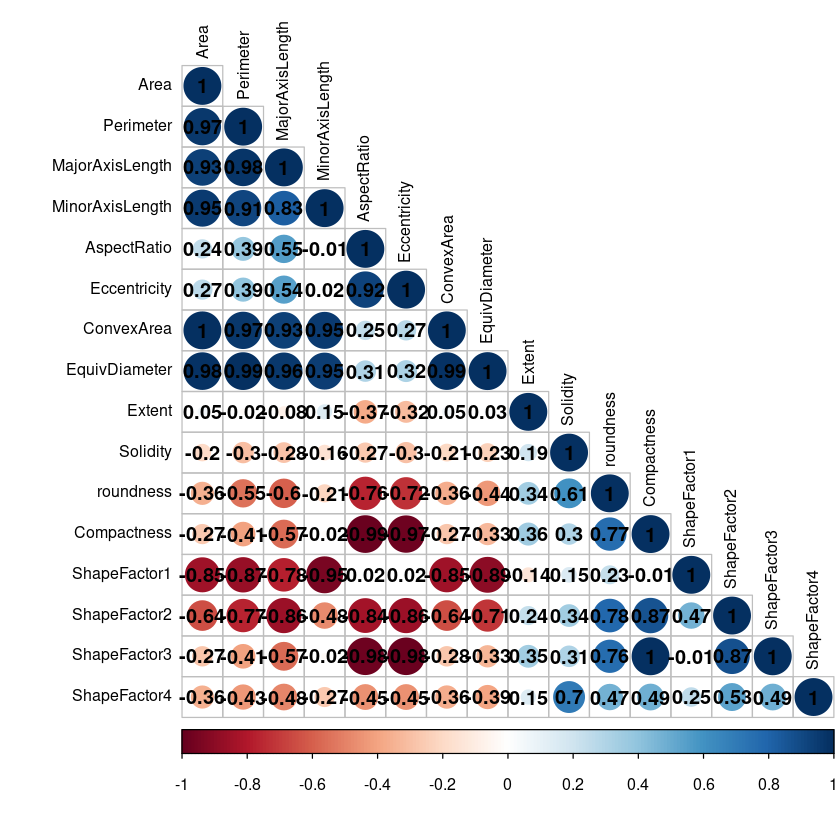

In [4]:
#Question 1C

if (!require(corrplot)) install.packages("corrplot")
library(corrplot)

numeric_cols <- beans[ , sapply(beans, is.numeric)]
# Compute correlation matrix (excluding rows with NA)
cor_matrix <- cor(numeric_cols, use = "complete.obs")

# Draw the correlation plot
corrplot(cor_matrix, method = "circle", type = "lower", tl.cex = 0.8, tl.col = "black", addCoef.col = "black")

Q1C：The correlation plot shows that several variables are highly correlated. For example: Area，Perimeter, MajorAxisLength, ConvexArea, and EquivDiameter all show strong positive correlations (r >0.95), suggesting redundancy. ShapeFactor1, ShapeFactor2, and Compactness are strongly negatively correlated with those area-based variables. These findings imply that feature reduction may be beneficial before modeling.

In [3]:
#Question 1D

if (!require(caret)) install.packages("caret", dependencies = TRUE)
library(caret)

set.seed(123)
train_index <- createDataPartition(beans$Class, p = 0.8, list = FALSE)

train_data <- beans[train_index, ]
test_data <- beans[-train_index, ]

dim(train_data)
dim(test_data)

[1] 10828    17

[1] 2705   17

Q1D. The beans data set was partitioned using createDataPartition() from the caret package. 80% of the data (10,828 rows) was used for training, and 20% (2,705 rows) for testing. 

In [15]:
# Question 1E - Train SVM model and report accuracy

# Load e1071 for SVM support if not loaded
if (!require(e1071)) install.packages("e1071")
library(e1071)

# Remove any rows with NA in training data
train_data_clean <- na.omit(train_data)

# Define training control
ctrl <- trainControl(method = "repeatedcv", number = 5, repeats = 3)

# Train the SVM model
svm_model <- train(Class ~ ., data = train_data_clean,
                   method = "svmLinear",
                   trControl = ctrl)
print(svm_model)


Support Vector Machines with Linear Kernel 

10827 samples
   16 predictor
    7 classes: 'BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 8661, 8660, 8662, 8663, 8662, 8661, ... 
Resampling results:

  Accuracy   Kappa    
  0.9265727  0.9111592

Tuning parameter 'C' was held constant at a value of 1


Q1E. An SVM model with linear kernel was trained using 5-fold cross-validation repeated 3 times. All features were used. The model showed high training accuracy.


In [16]:
# Question 1F
# Predict on test set 
test_data_clean <- na.omit(test_data)

predictions <- predict(svm_model, newdata = test_data_clean)

conf_mat <- confusionMatrix(predictions, test_data_clean$Class)
print(conf_mat)


Confusion Matrix and Statistics

          Reference
Prediction BARBUNYA BOMBAY CALI DERMASON HOROZ SEKER SIRA
  BARBUNYA      248      0    6        1     0     2    2
  BOMBAY          0    103    0        0     0     0    0
  CALI            8      1  312        0     9     0    0
  DERMASON        0      0    0      651     4     4   62
  HOROZ           0      0    4        1   352     0   11
  SEKER           3      0    0       11     0   386    7
  SIRA            5      0    4       44     7    13  444

Overall Statistics
                                         
               Accuracy : 0.9227         
                 95% CI : (0.912, 0.9325)
    No Information Rate : 0.2617         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.9065         
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: BARBUNYA Class: BOMBAY Class: CALI

Q1F.Model was tested on the 20% split. Confusion matrix showed ~92.27% accuracy. Most classes had sensitivity and specificity above 0.90.

In [13]:
# Question 1G – Classify 5 unknown beans

# Load the unknown beans data
unknown_beans <- read.csv("/public/bmort/R/beans-unknown.csv")

# Clean data: remove any NA just in case
unknown_beans_clean <- na.omit(unknown_beans)

# Predict classes using the trained SVM model (trained on all features)
predicted_classes <- predict(svm_model, newdata = unknown_beans_clean)

# Output predicted classes
print(predicted_classes)
head(unknown_beans_clean)



[1] DERMASON DERMASON DERMASON DERMASON DERMASON
Levels: BARBUNYA BOMBAY CALI DERMASON HOROZ SEKER SIRA


Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
37500,728.191,275.8405,173.8183,1.586948,0.7764811,37944,218.5097,0.7034064,0.9882985,0.8886905,0.7921597,0.007355746,0.001786723,0.6275169,0.9958364
37500,715.578,272.1718,175.6683,1.549351,0.7638180,37797,218.5097,0.7862295,0.9921422,0.9202952,0.8028373,0.007257915,0.001859952,0.6445477,0.9986305
37511,718.350,267.0398,179.1419,1.490660,0.7415988,37868,218.5417,0.7173647,0.9905725,0.9134743,0.8183865,0.007118972,0.001969840,0.6697565,0.9983793
37513,720.028,269.5896,177.5109,1.518721,0.7526256,37981,218.5476,0.7805452,0.9876780,0.9092701,0.8106676,0.007186565,0.001914575,0.6571819,0.9980761
37514,725.847,269.8812,177.4182,1.521158,0.7535472,37920,218.5505,0.7933091,0.9892932,0.8947734,0.8098026,0.007194146,0.001908427,0.6557802,0.9975454


Q1G. All 5 beans were predicted as DERMASON.